<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Fresnel-based DOE Stokes analyzer </font>
</div>

<div align="center"> 
<font size=4> Matriz de difracción </font>
</div>

- **Fecha**: 2022/03/31
        

   
- **Estado**:  Development, para paper

- **Objetivos**: 
    Procedimiento para eliminar los errores debidos a la interacción entre las lentes.
   
   

- **Descripción**: La idea es activar uno a uno (no a la vez) cada uno de los sectores. Se mete luz polarizada por cada no de los estados y se calcula la potencia en cada uno de los detectores. Esto va a suponer una matriz 6x6 que va a servir para invertirla: se mete un estado de polarización y se obtiene otro. Mediante la matriz de inversión se resuelve

- **Referencias**: Based on diffractio py module

- **Conclusiones**: 
    -  

- **Autores**: 
    - Luis Miguel Sánchez Brea
    - Jesús del Hoyo Muñoz (idea)


# Importaciones

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import diffractio
import matplotlib as mpl

from diffractio import degrees, mm, plt, sp, um, np, nm
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY

from diffractio.utils_drawing import draw_several_fields

In [3]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector
from py_pol.stokes import Stokes

In [4]:
from py_aocg.stokes_analyzer.stokes_analyzer import (Stokes_analyzer, compute_intensity, compute_stokes,compute_stokes_several,
                                                     states_standard, Detector, fill_sphere_fibonacci, conversion_standard)

In [5]:
import plotly.graph_objects as go

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [6]:
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.pad_inches']=0.0
mpl.rcParams['figure.subplot.hspace']=0
mpl.rcParams['figure.subplot.wspace']=0
mpl.rcParams['figure.subplot.left']=0.075

In [7]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings('ignore') 

# Generation of the Polarization State Analyzer with N fresnel zones

In [8]:
num_sectors = 6
angulosector = 360/num_sectors
focal = 200 * mm
r_shift = 1.5*mm
has_draw = True
detector_radius = 200*um

In [9]:
num_pixels = 512
length = 10*mm

x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um


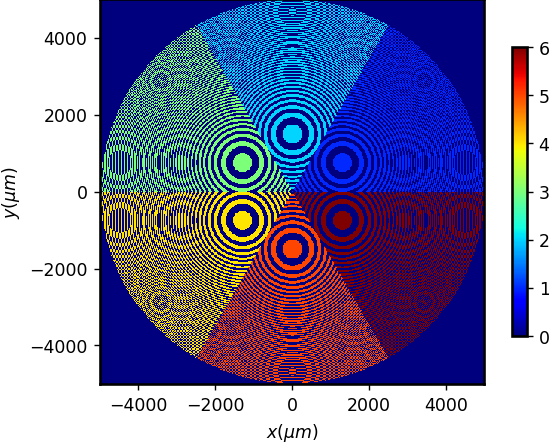

In [10]:

mpl.rcParams['figure.figsize']=(5,4)

i_stokes_analyzer = Stokes_analyzer(x0, y0, wavelength)
i_stokes_analyzer.stokes_analyzer_lens_indexes(focal, r_shift, num_sectors=6)
i_stokes_analyzer.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); 
plt.clim(vmin=0)

# Generación de máscara vectorial

## Asignación de estados de polarización a cada uno de los índices

In [11]:
States = states_standard()

## Creación de máscara vectorial

In [12]:
mpl.rcParams['figure.figsize']=(6,6)


mask_vector_0 = Vector_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask_vector_0.multilevel_mask(mask=i_stokes_analyzer, states=States, discretize=False, normalize=False)

<Figure size 750x750 with 0 Axes>

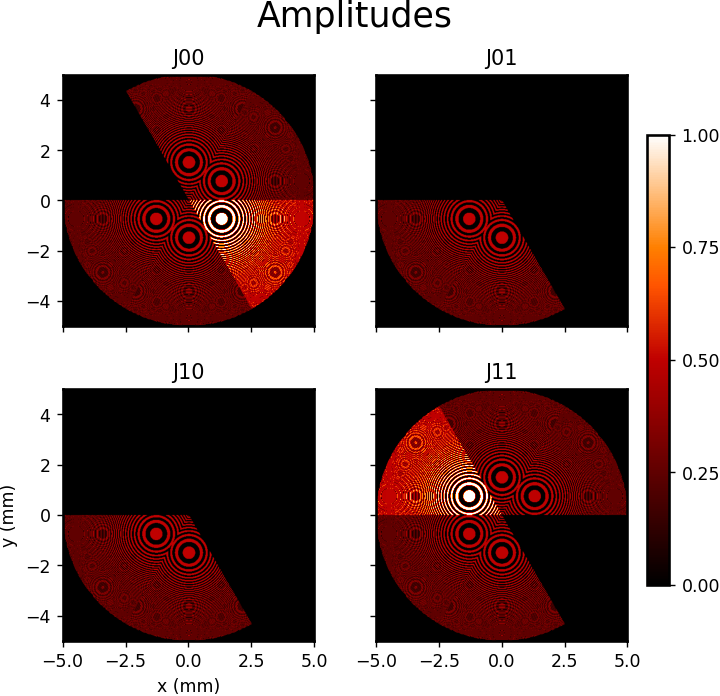

In [13]:
mask_vector_0.draw('amplitude', z_scale='mm');


# Calculo de los detectores. Generamos detectores centrados en los puntos focales


In [14]:
standard_vectors=[(1,0), (0,1), (1/np.sqrt(2),1/np.sqrt(2)), (1/np.sqrt(2),-1/np.sqrt(2)), (1/np.sqrt(2),1j/np.sqrt(2)), (1/np.sqrt(2),-1j/np.sqrt(2))]

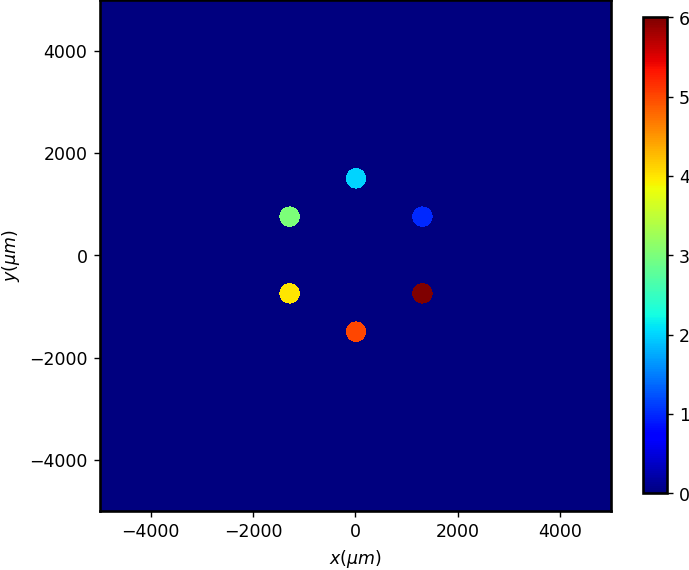

In [17]:
detector = Detector(x0, y0, wavelength)
detector.circular(focal, r_shift,    detector_radius= detector_radius,   num_sectors=num_sectors,  has_draw=True)
detector.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)
plt.savefig("detector_index.pdf")

S normalized = 
[+1.000]   
[+1.000]   
[+0.000]   
[-0.000]   



Text(-2175.0, 1875.0, '(1,1,0,0)')

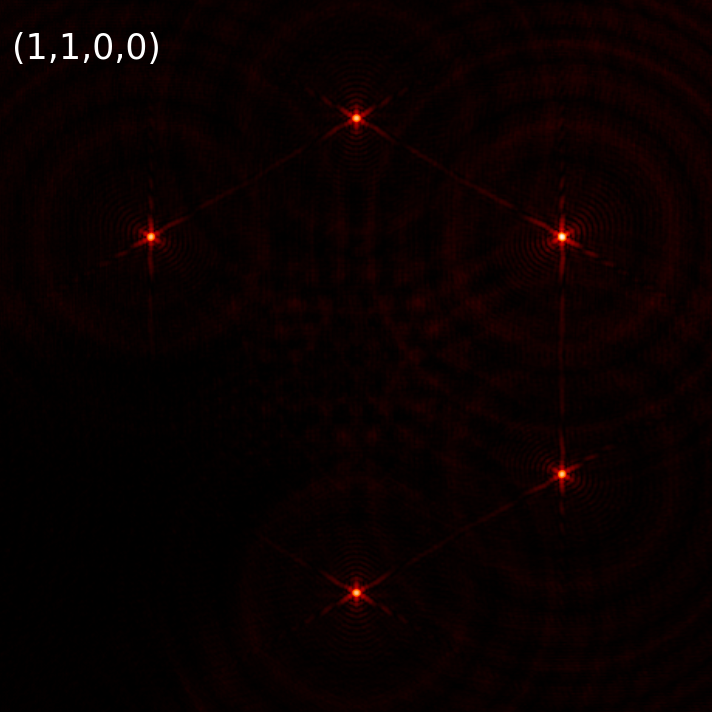

In [15]:
jones_input = Jones_vector().from_components(standard_vectors[0])
stk=Stokes().from_Jones(jones_input)
stk=stk.normalize()
print(stk)

intensidad_z, J_z = compute_intensity(jones_input, mask_vector_0, u=1, z_obs=focal, r_shift=r_shift, has_draw=True)
plt.text(-1.45*r_shift,1.25*r_shift,'(1,1,0,0)', fontsize=20, color='white')

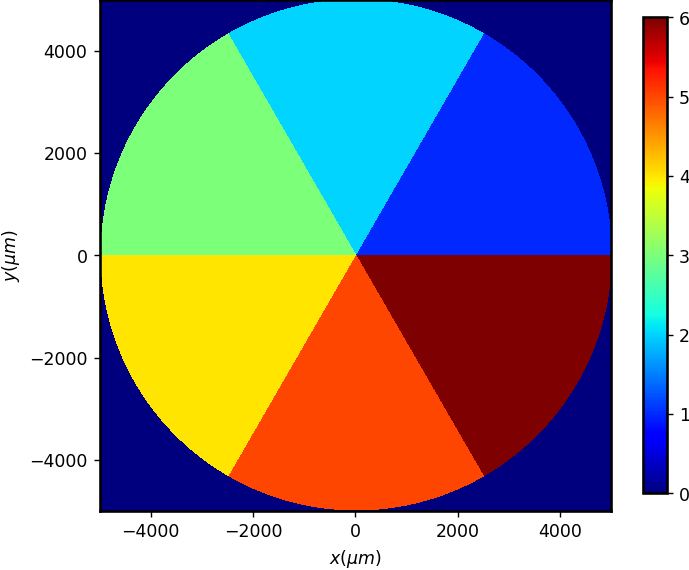

In [40]:
Mascara_sector = Detector(x0, y0, wavelength)
Mascara_sector.slices(focal, r_shift,    num_sectors=num_sectors, fill_sectors=1, radius_size=10000, has_draw=True)
Mascara_sector.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)
plt.savefig("sector_index.pdf")

## Cálculo de señales

[0.0134 0.     0.     0.     0.     0.    ]
[0.     0.0066 0.     0.     0.     0.    ]
[0.     0.     0.0134 0.     0.     0.    ]
[0.     0.     0.     0.0134 0.     0.    ]
[0.     0.     0.     0.     0.0133 0.    ]
[0.0001 0.     0.     0.     0.0001 0.0268]


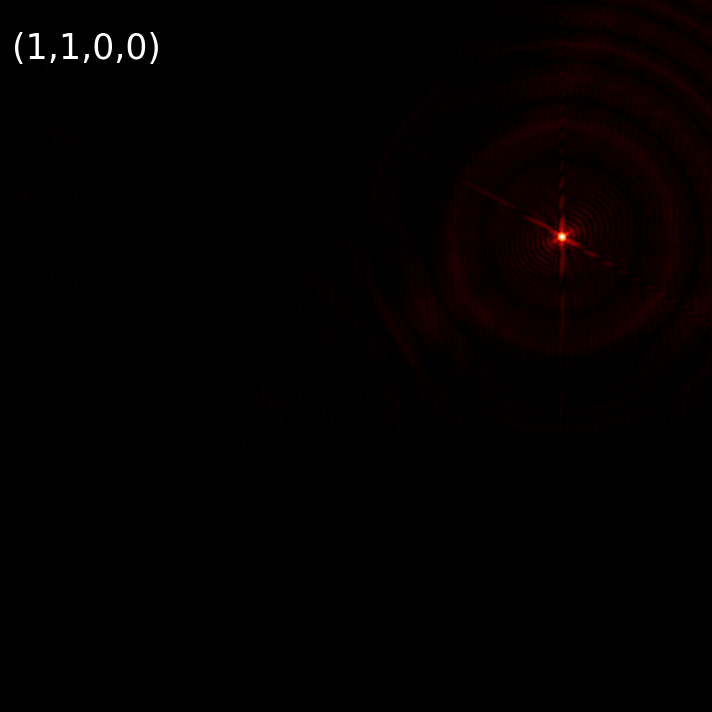

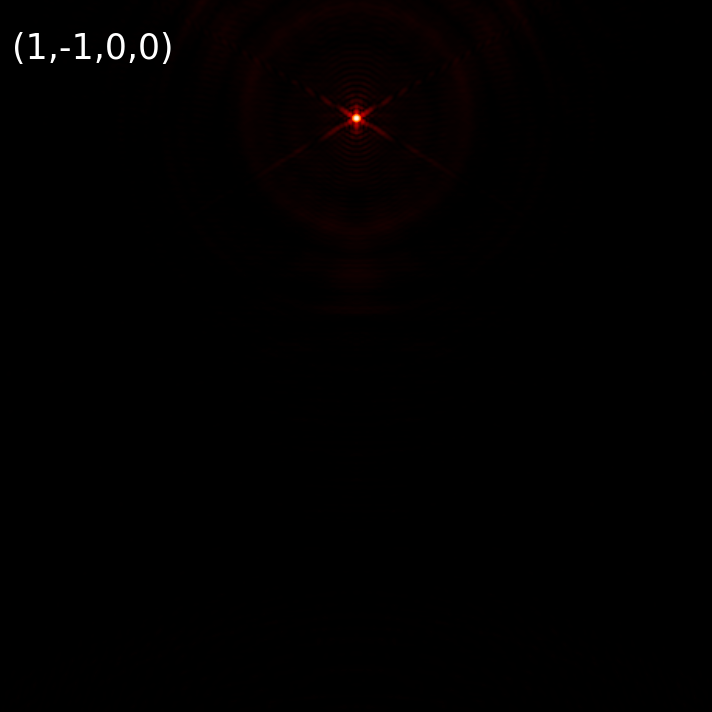

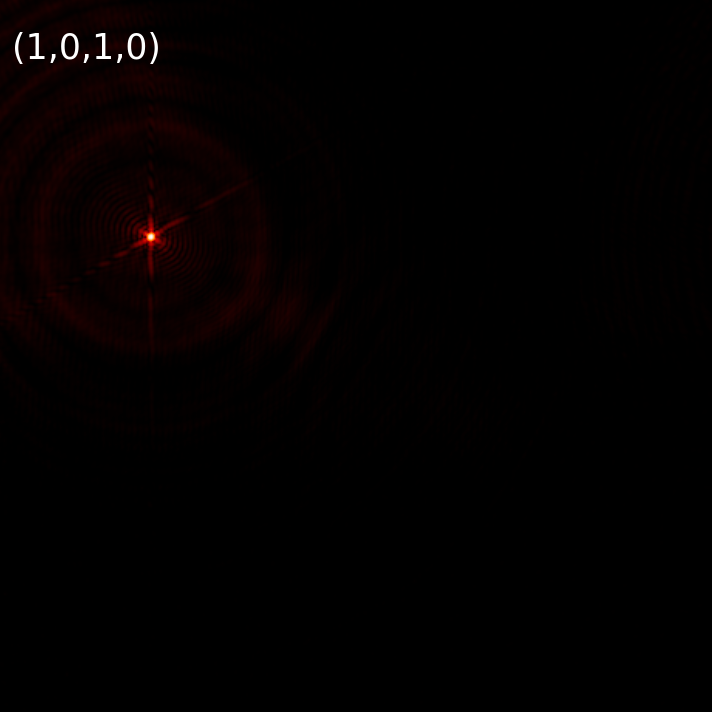

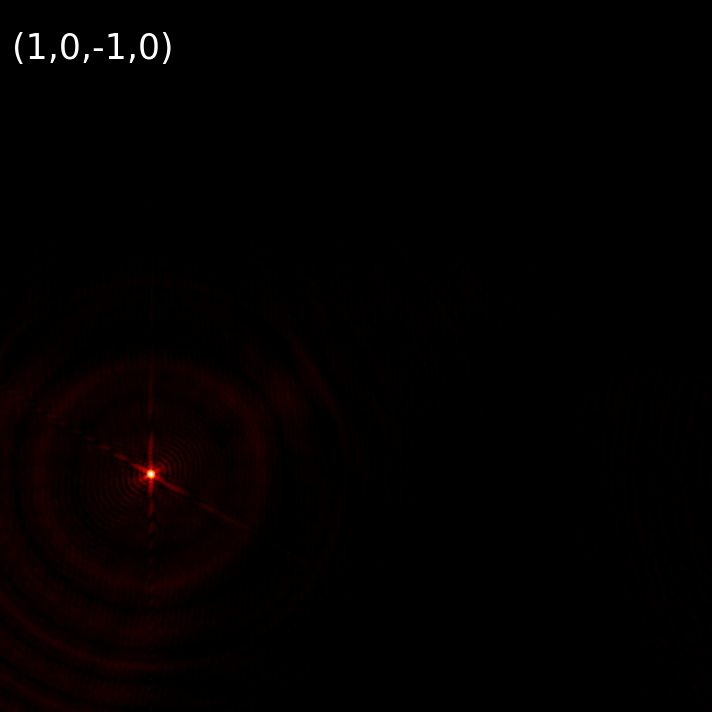

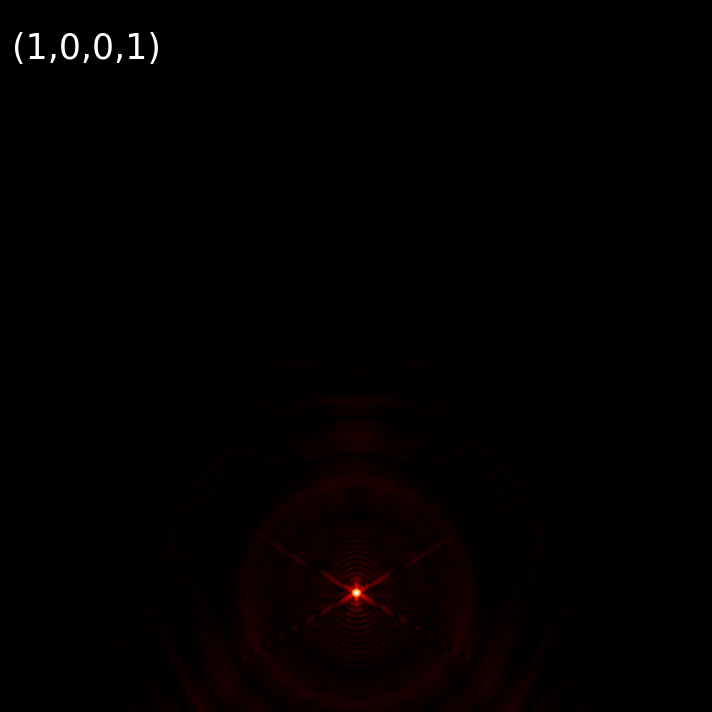

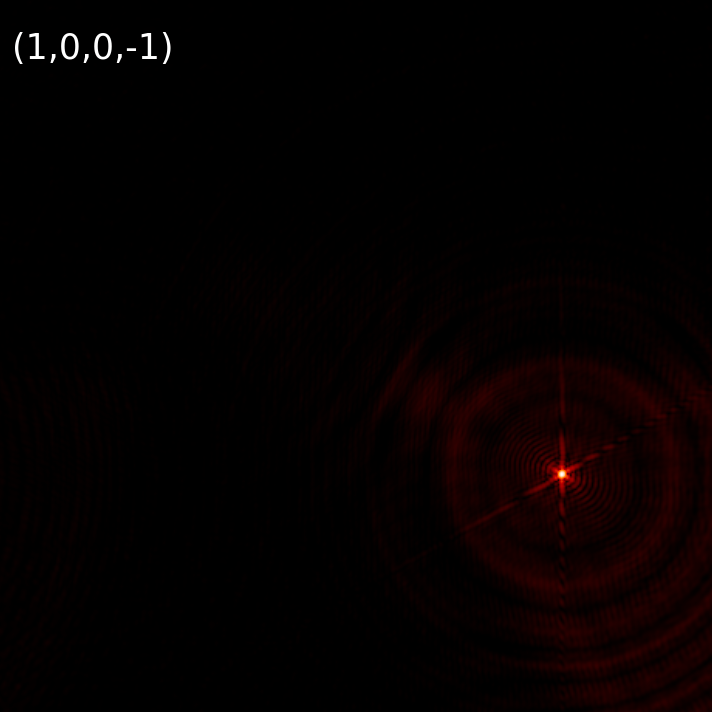

In [38]:
titles=('(1,1,0,0)','(1,-1,0,0)','(1,0,1,0)','(1,0,-1,0)','(1,0,0,1)','(1,0,0,-1)','(1,-2/3,2/3,1/3)')


conversion_signals=(np.zeros((num_sectors,num_sectors)))

for i in range(num_sectors):
    sector = Scalar_mask_XY(x0,y0,wavelength)
    sector.u[Mascara_sector.u==i+1]=1 # las detecciones son entre 1 y 6

    mask_sector = mask_vector_0.duplicate()
    #mask_vector_0.draw()

    
    mask_sector.apply_scalar_mask(sector)
    #mask_sector.draw()

    jones_input = Jones_vector().from_components(standard_vectors[i])

    intensidad_z, J_z = compute_intensity(jones_input, mask_sector, u=1, z_obs=focal, r_shift=r_shift, has_draw=True)

    signals, stokes_result, jones_result, error = compute_stokes(jones_input, intensidad_z, r_shift, num_sectors, mask_sector, 
                                                                 detector, conversion_matrix=conversion_standard, has_draw=False, filter=True, has_background=False)
    plt.text(-1.45*r_shift,1.25*r_shift,titles[i], fontsize=20, color='white')

    print(signals) # , '\n\n', signals/signals.max())
    
    if True:
        plt.savefig("detector_unitary_{}.pdf".format(i))
    conversion_signals[:,i]=signals/signals.max()
                    
conversion_matrix=np.matrix(conversion_signals)
conversion_matrix_inverse=conversion_matrix.I


In [19]:
np.savez("diffraction_matrix_512.npz", conversion_matrix=conversion_matrix_inverse)

In [35]:
conversion_matrix_inverse

matrix([[ 1.    , -0.0022, -0.0012, -0.0008, -0.001 , -0.002 ],
        [-0.002 ,  1.    , -0.002 , -0.0007, -0.0025, -0.0007],
        [-0.0012, -0.0022,  1.    , -0.002 , -0.001 , -0.0008],
        [-0.0008, -0.001 , -0.002 ,  1.    , -0.0022, -0.0012],
        [-0.0007, -0.0025, -0.0007, -0.002 ,  1.    , -0.002 ],
        [-0.002 , -0.001 , -0.0008, -0.0012, -0.0022,  1.    ]])

# Hacer funcion

In [100]:
def diffraction_matrix(mask_vector_0, jones_vectors, num_sectors, detector, z, r_shift, has_draw=False, verbose=True):
    """    Procedimiento para eliminar los errores debidos a la interacción entre las lentes.
    La idea es activar uno a uno (no a la vez) cada uno de los sectores. Se mete luz polarizada por cada no de los estados y se calcula la potencia en cada uno de los detectores. Esto va a suponer una matriz 6x6 que va a servir para invertirla: se mete un estado de polarización y se obtiene otro. Mediante la matriz de inversión se resuelve

    Está en Stokes_lens_ideal_matriz_difraccion:
    """
    conversion_signals = (np.zeros((num_sectors, num_sectors)))

    x0 = mask_vector_0.x
    y0 = mask_vector_0.y
    wavelength = mask_vector_0.wavelength
    Mascara_sector = Detector(x0, y0, wavelength)
    Mascara_sector.slices(z, r_shift, num_sectors=num_sectors, fill_sectors=1, radius_size=10000, has_draw=True)

    for i in range(num_sectors):

        sector = Scalar_mask_XY(x0, y0, wavelength)
        sector.u[Mascara_sector.u == i + 1] = 1  # las detecciones son entre 1 y 6

        mask_sector = mask_vector_0.duplicate()
        # mask_vector_0.draw()

        mask_sector.apply_scalar_mask(sector)
        # mask_sector.draw()

        jones_input = Jones_vector().from_components(jones_vectors[i])
        stokes_input = Stokes().from_Jones(jones_input)
        m = stokes_input.M.flatten()
        text = "[{:0.0f},{:0.0f},{:0.0f},{:0.0f}]".format(m[0], m[1], m[2], m[3])
        
        intensidad_z, J_z = compute_intensity(jones_input, mask_sector, u=1,
                                              z_obs=z, r_shift=r_shift, has_draw=has_draw)

        signals, stokes_result, jones_result, error = compute_stokes(
            jones_input, intensidad_z, r_shift, num_sectors, mask_sector, detector, conversion_matrix=conversion_standard, has_draw=False, filter=True, has_background=False)

        conversion_signals[:, i] = signals / signals.max()

        if verbose:
            print(signals)  # , '\n\n', signals/signals.max())

        if has_draw:
            plt.text(-1.45 * r_shift, 1.25 * r_shift, text, fontsize=20, color='white')
            plt.savefig("detector_unitary_{}.pdf".format(i))

    conversion_matrix = np.matrix(conversion_signals)
    conversion_matrix_inverse = conversion_matrix.I
    return conversion_matrix_inverse


[0.0134 0.     0.     0.     0.     0.    ]
[0.     0.0066 0.     0.     0.     0.    ]
[0.     0.     0.0134 0.     0.     0.    ]
[0.     0.     0.     0.0134 0.     0.    ]
[0.     0.     0.     0.     0.0133 0.    ]
[0.0001 0.     0.     0.     0.0001 0.0268]


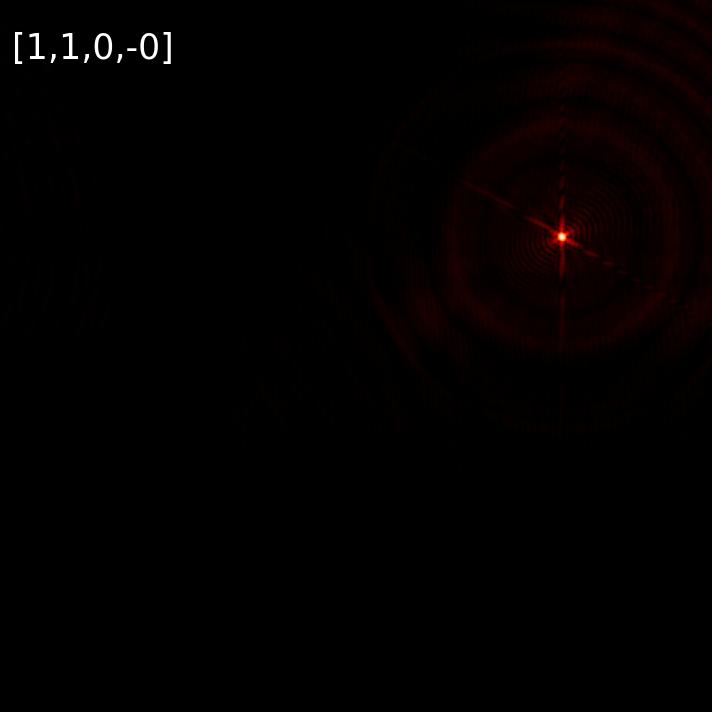

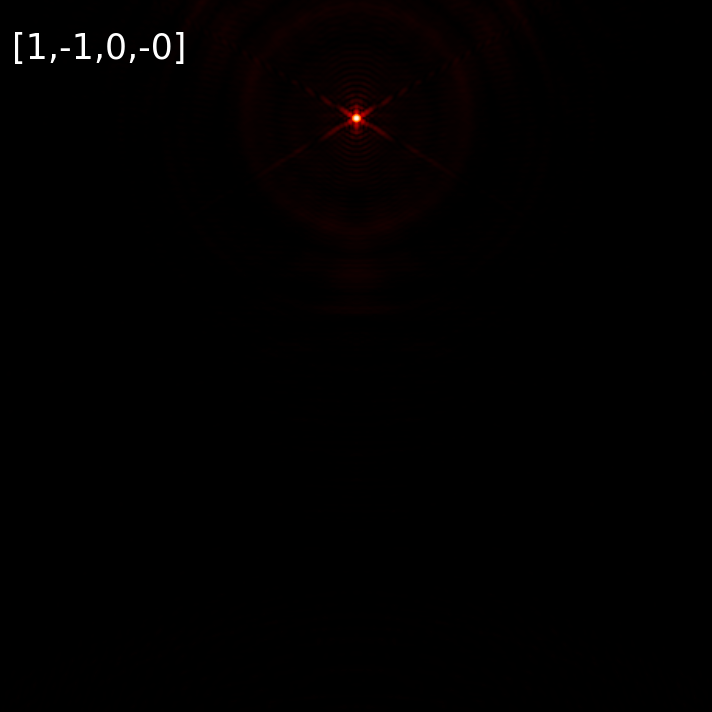

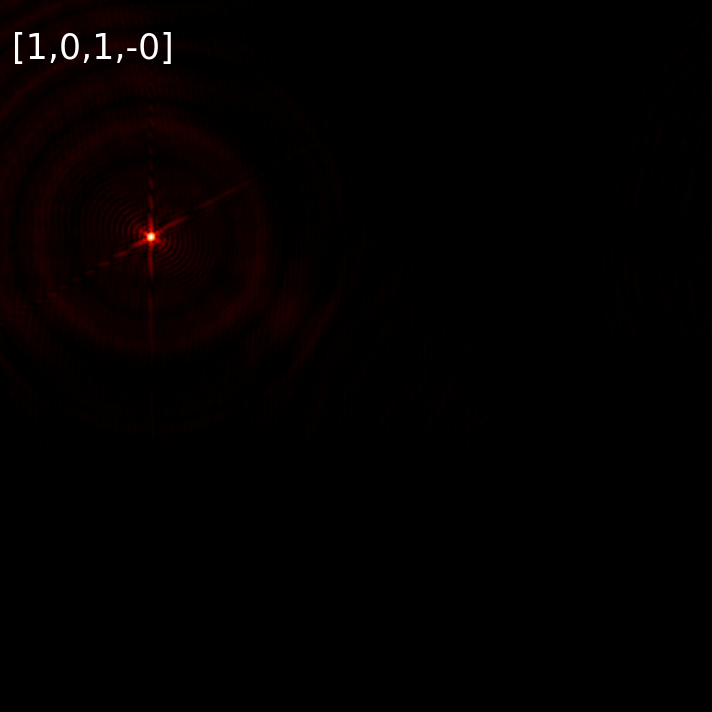

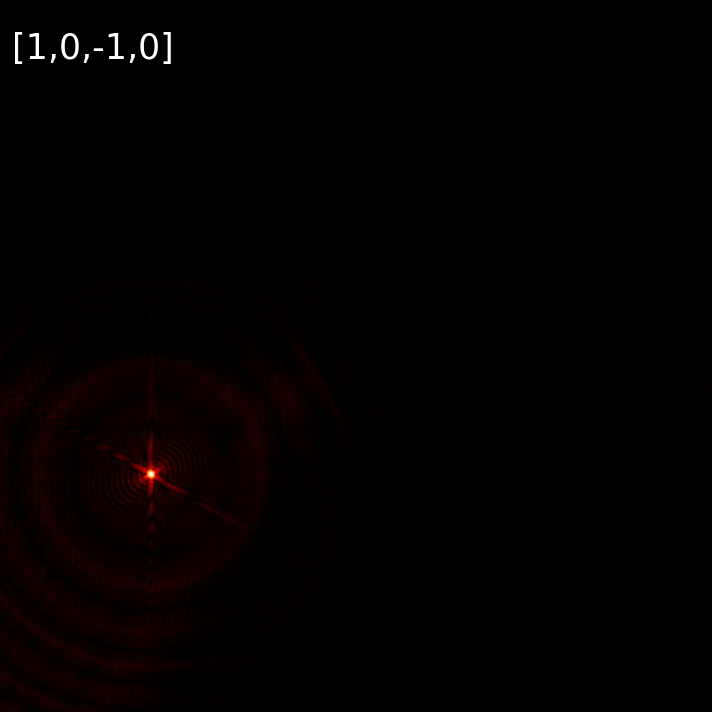

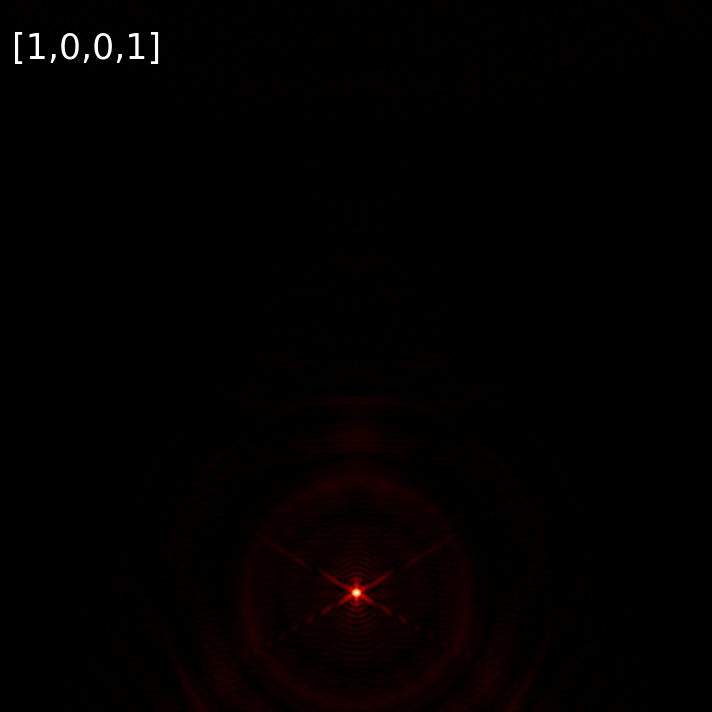

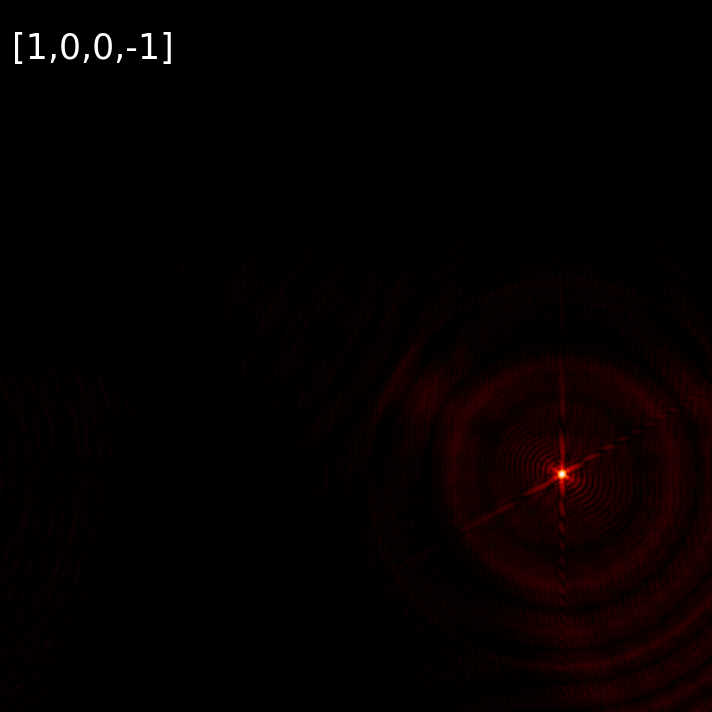

In [101]:
 conversion_matrix_inverse=diffraction_matrix(mask_vector_0, standard_vectors, num_sectors, detector, z=focal, r_shift=r_shift, has_draw=True, verbose=True)

In [52]:
conversion_matrix_inverse

matrix([[ 1.    , -0.0022, -0.0012, -0.0008, -0.001 , -0.002 ],
        [-0.002 ,  1.    , -0.002 , -0.0007, -0.0025, -0.0007],
        [-0.0012, -0.0022,  1.    , -0.002 , -0.001 , -0.0008],
        [-0.0008, -0.001 , -0.002 ,  1.    , -0.0022, -0.0012],
        [-0.0007, -0.0025, -0.0007, -0.002 ,  1.    , -0.002 ],
        [-0.002 , -0.001 , -0.0008, -0.0012, -0.0022,  1.    ]])

In [54]:
standard_vectors

[(1, 0),
 (0, 1),
 (0.7071067811865475, 0.7071067811865475),
 (0.7071067811865475, -0.7071067811865475),
 (0.7071067811865475, 0.7071067811865475j),
 (0.7071067811865475, (-0-0.7071067811865475j))]

# En clase

In [15]:
from py_aocg.stokes_analyzer.stokes_analyzer import diffraction_matrix

In [19]:

conversion_matrix = diffraction_matrix(mask_vector_0, standard_vectors, num_sectors, detector, focal, r_shift, has_draw=False, verbose=True)

[0.0136 0.0001 0.0001 0.0001 0.0001 0.0001]
[0.0001 0.0067 0.0001 0.     0.0008 0.    ]
[0.0001 0.0001 0.0136 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 0.0136 0.0001 0.0001]
[0.0001 0.0016 0.0001 0.0001 0.0134 0.0001]
[0.0001 0.0002 0.0001 0.0003 0.0002 0.0271]


In [20]:
np.savez("diffraction_matrix_512.npz", conversion_matrix=conversion_matrix)